# A. In this question, we work with a simplified version of Heart dataset. Read the dataset file “Heart_short.csv” from github, and assign it to a Pandas DataFrame:

df  = pd.read_csv("https://github.com/mpourhoma/CS4661/raw/master/Heart_short.csv")

In [2]:
import pandas as pd

# empty dataframe
df = pd.DataFrame()

# read CSV file from github link
df = pd.read_csv("https://github.com/mpourhoma/CS4661/raw/master/Heart_short.csv")
print(df)

     Age  RestBP  Chol  RestECG  MaxHR  Oldpeak  AHD
0     63     145   233        2    150      2.3   No
1     67     160   286        2    108      1.5  Yes
2     67     120   229        2    129      2.6  Yes
3     37     130   250        0    187      3.5   No
4     41     130   204        2    172      1.4   No
..   ...     ...   ...      ...    ...      ...  ...
276   45     110   264        0    132      1.2  Yes
277   68     144   193        0    141      3.4  Yes
278   57     130   131        0    115      1.2  Yes
279   57     130   236        2    174      0.0  Yes
280   38     138   175        0    173      0.0   No

[281 rows x 7 columns]


# B. Generate the feature matrix and label vector (AHD). Then, normalize (scale) the features.

In [6]:
# Feature Matrix

# create list of feature names
feature_cols = ['Age', 'RestBP', 'Chol', 'RestECG', 'MaxHR', 'Oldpeak']

x = df[feature_cols]

x.head()

,Age,RestBP,Chol,RestECG,MaxHR,Oldpeak
0,63,145,233,2,150,2.3
1,67,160,286,2,108,1.5
2,67,120,229,2,129,2.6
3,37,130,250,0,187,3.5
4,41,130,204,2,172,1.4


In [7]:
# checking size of matrix:
print(x.shape)

(281, 6)


In [8]:
# select the last column from the DataFrame
y = df['AHD'].eq('Yes').mul(1)

# check
y[::10]

0      0
10     0
20     0
30     0
40     0
50     0
60     0
70     0
80     0
90     0
100    0
110    0
120    0
130    0
140    0
150    1
160    0
170    1
180    0
190    0
200    0
210    1
220    0
230    0
240    0
250    1
260    1
270    1
280    0
Name: AHD, dtype: int64

In [10]:
# normalize the feature columns using mean normalization
normalized_df = (x - x.mean()) / x.std()

x = normalized_df[feature_cols]

# add the AHD label to the normalized dataframe
normalized_df['AHD'] = y

print(normalized_df)

          Age    RestBP      Chol   RestECG     MaxHR   Oldpeak  AHD
0    0.946195  0.748449 -0.258137  1.045571 -0.009177  1.129814    0
1    1.382960  1.595579  0.751963  1.045571 -1.844840  0.434734    1
2    1.382960 -0.663434 -0.334371  1.045571 -0.927008  1.390469    1
3   -1.892778 -0.098681  0.065857 -0.966795  1.607955  2.172434    0
4   -1.456013 -0.098681 -0.810834  1.045571  0.952361  0.347849    0
..        ...       ...       ...       ...       ...       ...  ...
276 -1.019248 -1.228188  0.332676 -0.966795 -0.795890  0.174079    1
277  1.492151  0.691974 -1.020477 -0.966795 -0.402533  2.085549    1
278  0.291047 -0.098681 -2.202104 -0.966795 -1.538896  0.174079    1
279  0.291047 -0.098681 -0.200962  1.045571  1.039774 -0.868541    1
280 -1.783587  0.353122 -1.363530 -0.966795  0.996067 -0.868541    0

[281 rows x 7 columns]


# C. Split the dataset into testing and training sets with the following parameters: test_size=0.25, random_state=3.

In [13]:
# picks 25% of data samples for testing set

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=3)

print(x_test)
print('\n')
print(y_test)

          Age    RestBP      Chol   RestECG     MaxHR   Oldpeak
253  1.055386  2.160332 -0.372488  1.045571  0.209355 -0.347231
74   0.509430 -1.228188 -0.143786  1.045571 -0.358827  0.174079
230  1.055386 -0.211632  0.313617 -0.966795 -1.975959 -0.694771
38   0.072665  0.014270  2.028882 -0.966795 -0.795890  0.174079
16  -0.691674 -1.228188 -0.334371 -0.966795  0.777536  0.000309
..        ...       ...       ...       ...       ...       ...
15   0.291047  1.030826 -1.496939 -0.966795  1.039774  0.521619
78  -1.019248 -0.945811  0.256442  1.045571  1.520543 -0.868541
109 -0.364100 -2.131793 -0.372488 -0.966795  0.165648 -0.868541
122  0.400238 -1.510564 -0.124728  1.045571  0.165648 -0.347231
142 -0.691674 -0.437533  0.161149 -0.966795  1.083480 -0.868541

[71 rows x 6 columns]


253    0
74     1
230    0
38     1
16     1
      ..
15     0
78     0
109    0
122    0
142    0
Name: AHD, Length: 71, dtype: int64


# D. Use Logistic Regression Classifier to predict Heart Disease occurrence based on the training/testing datasets that you built in part(c). Then, compute and report the Accuracy.

Now, Use Logistic Regression Classifier to predict the probability of Heart Disease based on the training/testing datasets that you built in part (c) (you have to use “my_logreg.predict_proba” method rather than “my_logreg.predict”). Then, Plot the Roc Curve for this classifier, and also Compute the AUC (Area Under Curve for ROC).

In [14]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

In [16]:
# using fit method - training only on the training set
logreg.fit(x_train, y_train)

LogisticRegression()

In [17]:
# testing on the testing set
y_predict_logreg = logreg.predict(x_test)

print(y_predict_logreg)

[1 0 1 1 0 0 0 0 1 0 1 0 1 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 0 1 1 1 0 0 1 1
 0 1 0 0 1 0 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]


In [18]:
# logistic regression accuracy evaluation
from sklearn.metrics import accuracy_score

accuracy_logreg = accuracy_score(y_test, y_predict_logreg)

print(accuracy_logreg)

0.7183098591549296


In [20]:
# estimating the likelihood for each Label: 
y_proba_logreg = logreg.predict_proba(x_test)

print(y_proba_logreg)

[[0.4984775  0.5015225 ]
 [0.55151993 0.44848007]
 [0.39516326 0.60483674]
 [0.39639956 0.60360044]
 [0.84630632 0.15369368]
 [0.77040107 0.22959893]
 [0.73482529 0.26517471]
 [0.86546656 0.13453344]
 [0.35533417 0.64466583]
 [0.67079933 0.32920067]
 [0.09561384 0.90438616]
 [0.91923088 0.08076912]
 [0.29100204 0.70899796]
 [0.43046424 0.56953576]
 [0.66807459 0.33192541]
 [0.85922722 0.14077278]
 [0.11601878 0.88398122]
 [0.68323128 0.31676872]
 [0.1124336  0.8875664 ]
 [0.3349011  0.6650989 ]
 [0.85410194 0.14589806]
 [0.86374193 0.13625807]
 [0.22499744 0.77500256]
 [0.92908907 0.07091093]
 [0.10922259 0.89077741]
 [0.57442055 0.42557945]
 [0.72926215 0.27073785]
 [0.43214504 0.56785496]
 [0.6775139  0.3224861 ]
 [0.77597533 0.22402467]
 [0.30117121 0.69882879]
 [0.1086773  0.8913227 ]
 [0.17560758 0.82439242]
 [0.89155965 0.10844035]
 [0.81004923 0.18995077]
 [0.01130368 0.98869632]
 [0.06728968 0.93271032]
 [0.73256687 0.26743313]
 [0.2048516  0.7951484 ]
 [0.51452402 0.48547598]


In [22]:
print("actual label of the testing set: ")
print(y_test)
print("\n")

print("predicted label for the testing set: ")
print(y_predict_logreg)
print("\n")

print("estimated likelihood of both labels for the testing set: ")
print(y_proba_logreg)
print("\n")

print("estimated likelihood of label=1 for the testing set: ")
print(y_proba_logreg[:,1])
print("\n")

actual label of the testing set: 
253    0
74     1
230    0
38     1
16     1
      ..
15     0
78     0
109    0
122    0
142    0
Name: AHD, Length: 71, dtype: int64


predicted label for the testing set: 
[1 0 1 1 0 0 0 0 1 0 1 0 1 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 0 1 1 1 0 0 1 1
 0 1 0 0 1 0 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]


estimated likelihood of both label for the testing set: 
[[0.4984775  0.5015225 ]
 [0.55151993 0.44848007]
 [0.39516326 0.60483674]
 [0.39639956 0.60360044]
 [0.84630632 0.15369368]
 [0.77040107 0.22959893]
 [0.73482529 0.26517471]
 [0.86546656 0.13453344]
 [0.35533417 0.64466583]
 [0.67079933 0.32920067]
 [0.09561384 0.90438616]
 [0.91923088 0.08076912]
 [0.29100204 0.70899796]
 [0.43046424 0.56953576]
 [0.66807459 0.33192541]
 [0.85922722 0.14077278]
 [0.11601878 0.88398122]
 [0.68323128 0.31676872]
 [0.1124336  0.8875664 ]
 [0.3349011  0.6650989 ]
 [0.85410194 0.14589806]
 [0.86374193 0.13625807]
 [0.22499744 0.77500256]
 [0.92908907

In [23]:
# positive and false rate
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_proba_logreg[:,1], pos_label=1)

print(fpr)
print(tpr)

[0.         0.         0.02439024 0.02439024 0.04878049 0.04878049
 0.09756098 0.09756098 0.12195122 0.12195122 0.14634146 0.14634146
 0.2195122  0.2195122  0.29268293 0.29268293 0.3902439  0.3902439
 0.41463415 0.41463415 0.46341463 0.46341463 0.56097561 0.56097561
 0.68292683 0.68292683 0.70731707 0.70731707 0.73170732 0.73170732
 1.        ]
[0.         0.03333333 0.03333333 0.33333333 0.33333333 0.36666667
 0.36666667 0.4        0.4        0.53333333 0.53333333 0.6
 0.6        0.63333333 0.63333333 0.7        0.7        0.73333333
 0.73333333 0.76666667 0.76666667 0.83333333 0.83333333 0.86666667
 0.86666667 0.93333333 0.93333333 0.96666667 0.96666667 1.
 1.        ]


In [26]:
# area under the curve:
AUC = metrics.auc(fpr, tpr)
print(AUC)

0.7650406504065042


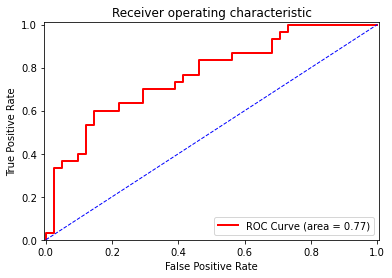

In [27]:
# ROC curve
import matplotlib.pyplot as plt

# tells Jupyter Notebook to keep the figures inside page 
# instead of opening a new window:
%matplotlib inline

plt.figure()

# roc curve:
plt.plot(fpr, tpr, color='red', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC)

# random guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# define range of x-axis and y-axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# labels, title, legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()